In [1]:
import pandas as pd
import klib as k
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, \
GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.sample(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
8957,INN08958,2,0,0,1,Meal Plan 1,0,Room_Type 1,39,2018,12,27,Offline,0,0,0,65.00,1,Not_Canceled
18981,INN18982,2,0,2,5,Meal Plan 1,0,Room_Type 4,21,2018,12,3,Online,0,0,0,97.75,1,Not_Canceled
12385,INN12386,1,0,0,2,Meal Plan 2,0,Room_Type 1,292,2018,7,21,Offline,0,0,0,90.00,0,Not_Canceled
28162,INN28163,1,0,0,3,Meal Plan 1,1,Room_Type 1,29,2018,4,5,Corporate,1,0,2,67.00,0,Not_Canceled
30710,INN30711,3,0,2,2,Meal Plan 2,0,Room_Type 4,31,2018,6,26,Online,0,0,0,192.60,0,Canceled
12138,INN12139,1,0,1,2,Meal Plan 1,0,Room_Type 1,180,2018,10,10,Offline,0,0,0,120.00,0,Canceled
30485,INN30486,2,0,1,3,Meal Plan 1,0,Room_Type 1,14,2017,9,7,Online,0,0,0,109.75,2,Not_Canceled
13715,INN13716,1,0,0,2,Meal Plan 1,0,Room_Type 1,2,2018,11,2,Corporate,1,0,1,65.00,1,Not_Canceled
28012,INN28013,2,0,1,2,Meal Plan 1,0,Room_Type 1,256,2017,9,14,Offline,0,0,0,76.67,0,Not_Canceled
20531,INN20532,2,2,1,2,Meal Plan 1,0,Room_Type 7,52,2018,10,28,Online,0,0,0,192.59,1,Not_Canceled


In [4]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.shape

(36275, 19)

In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


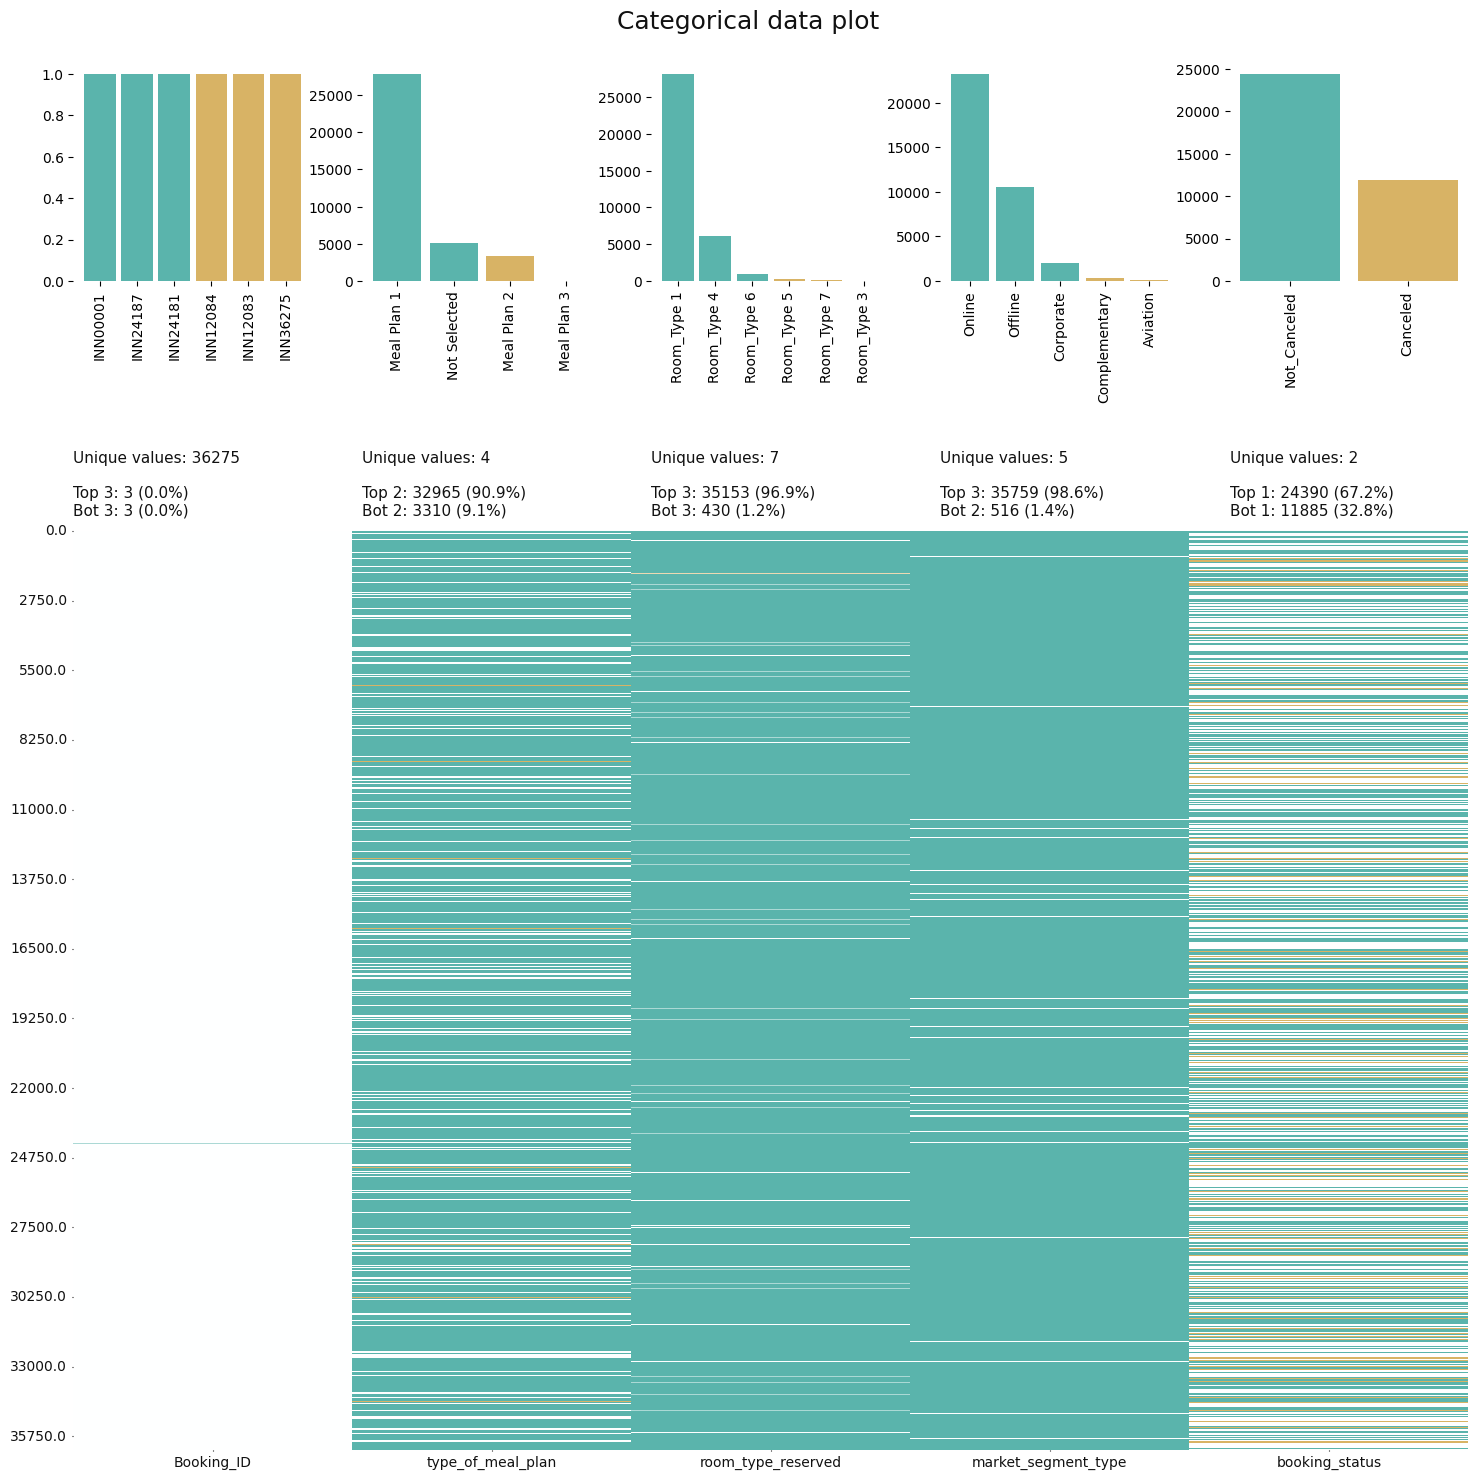

In [8]:
k.cat_plot(df);

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


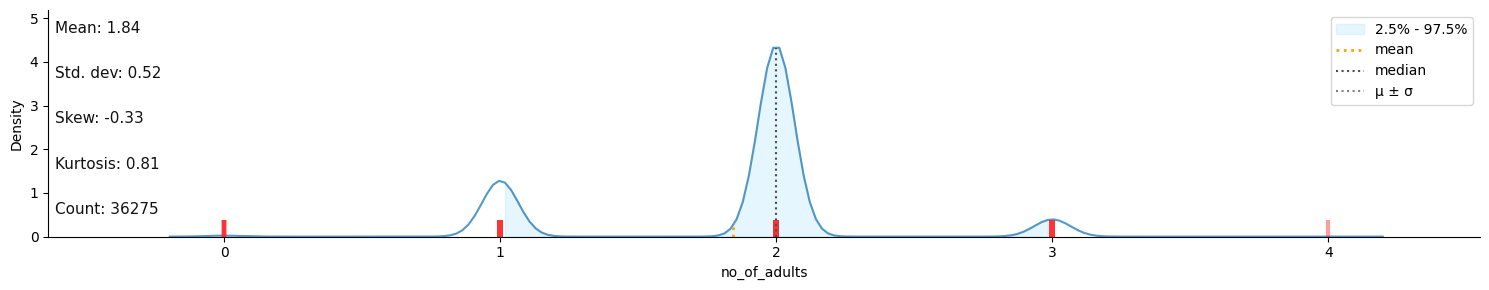

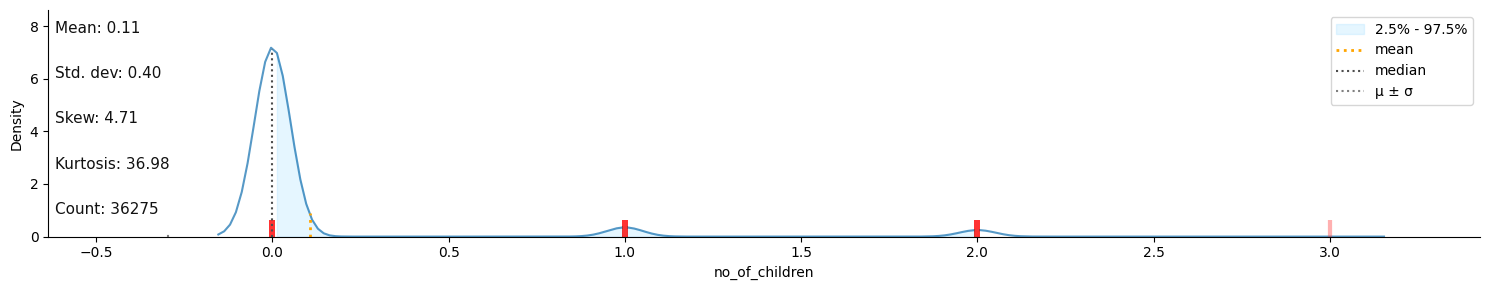

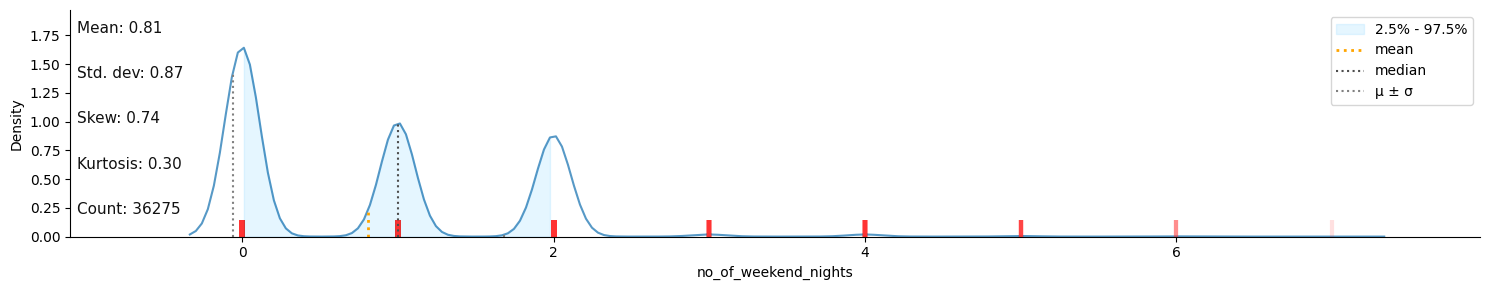

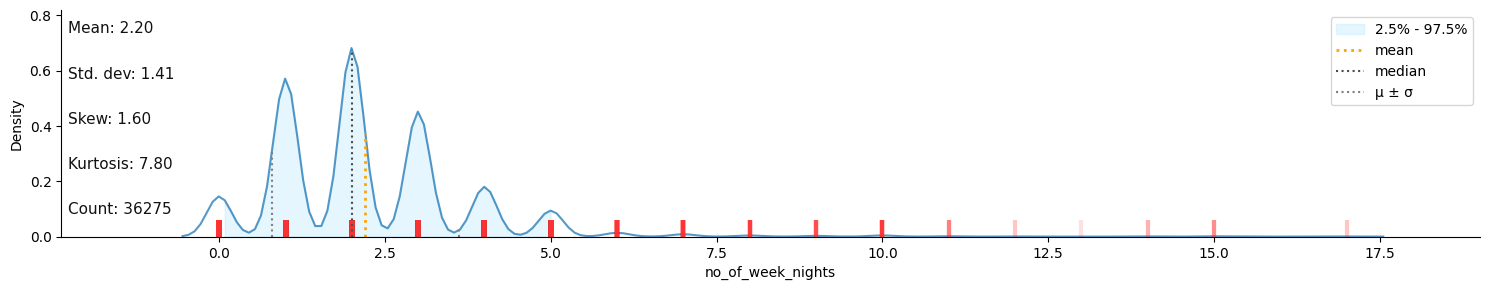

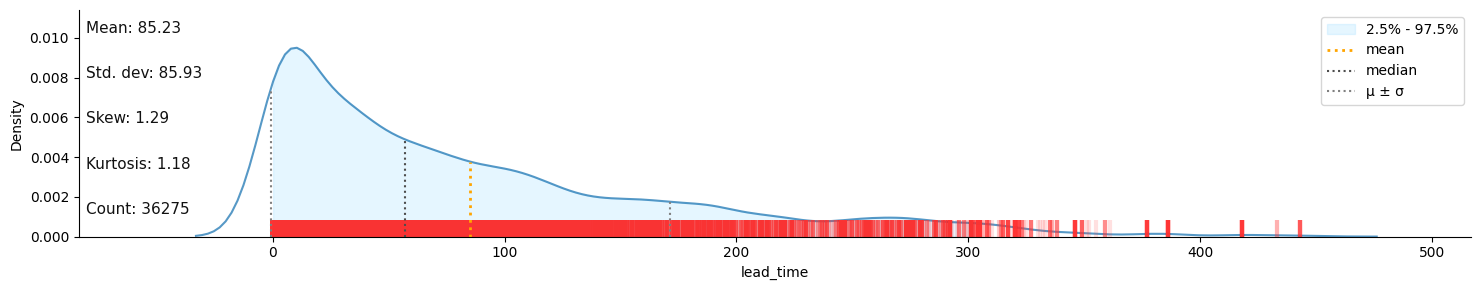

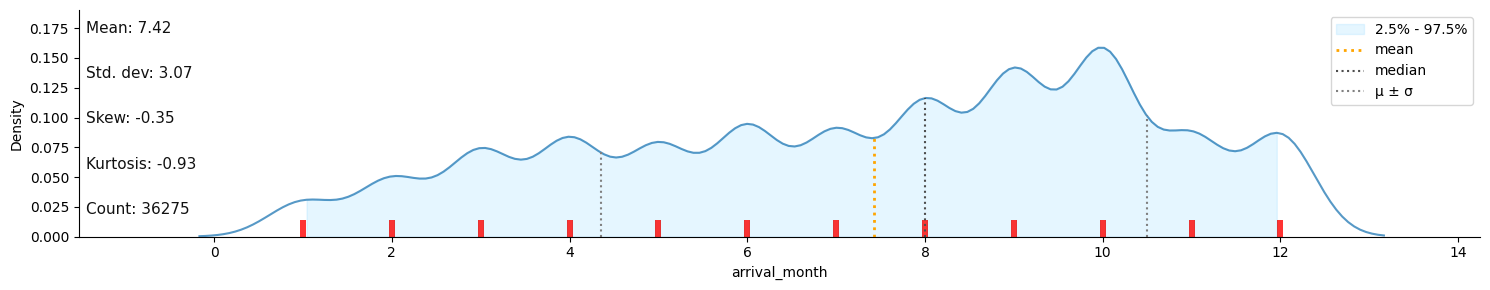

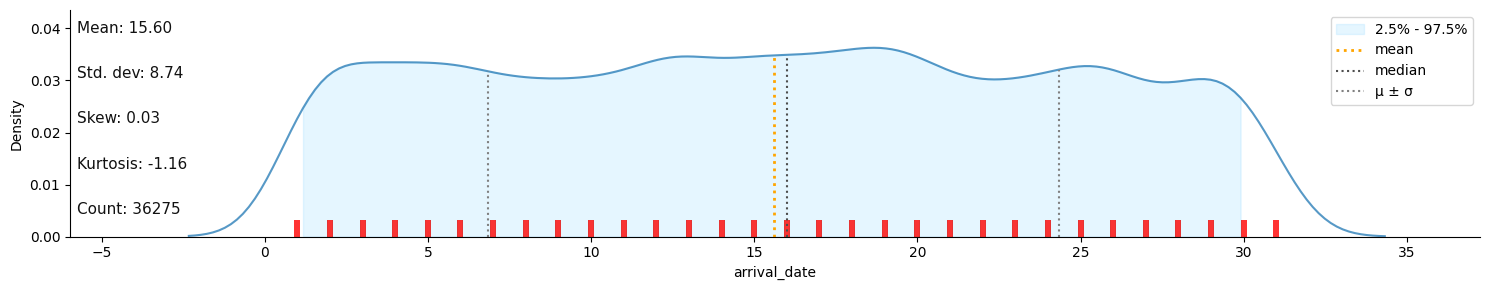

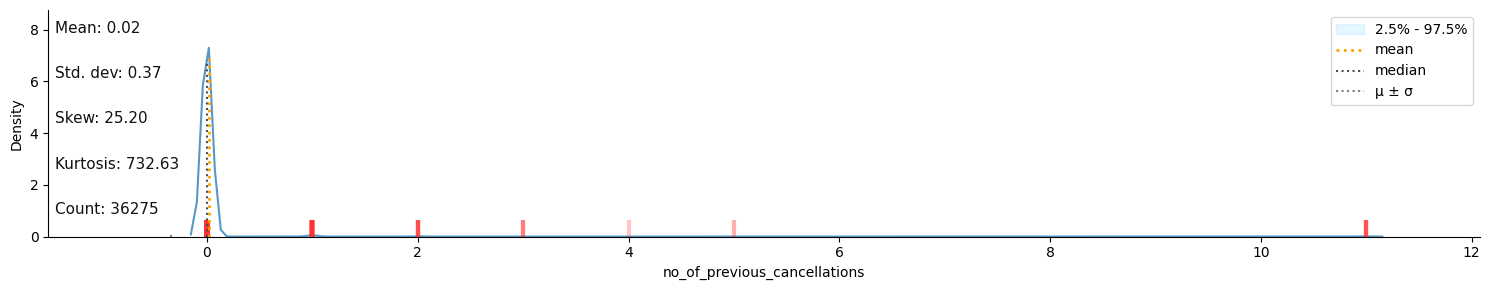

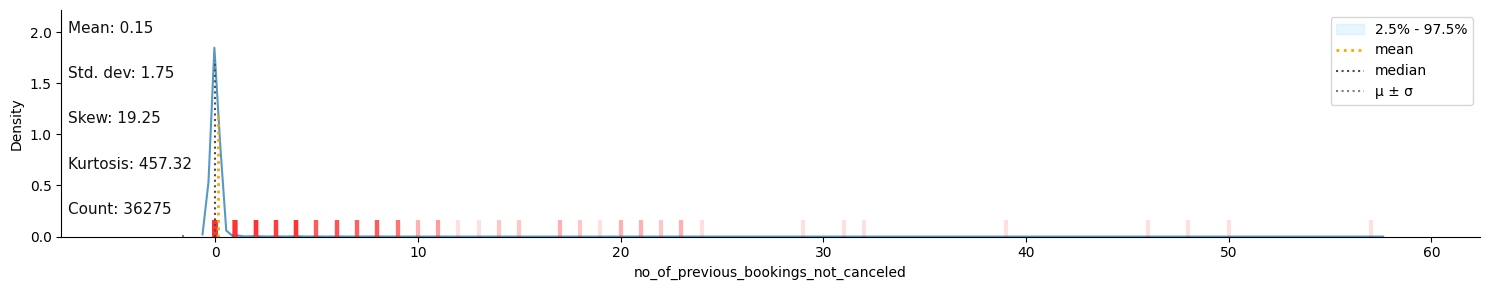

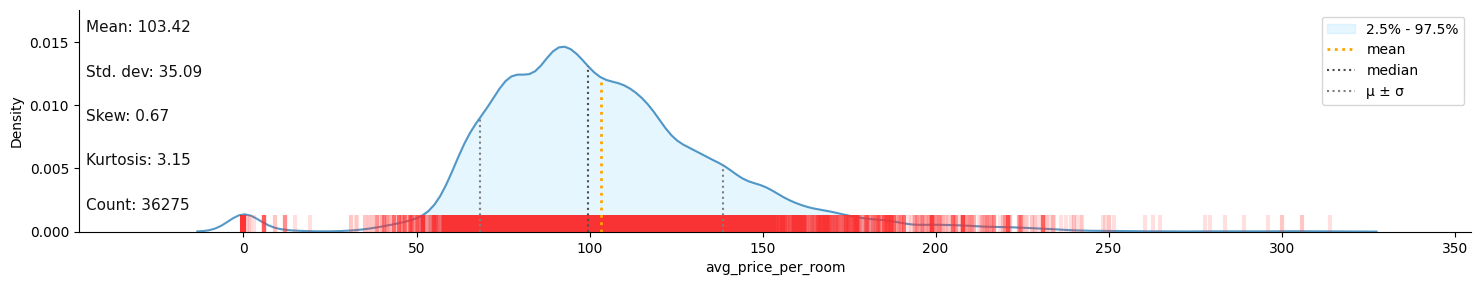

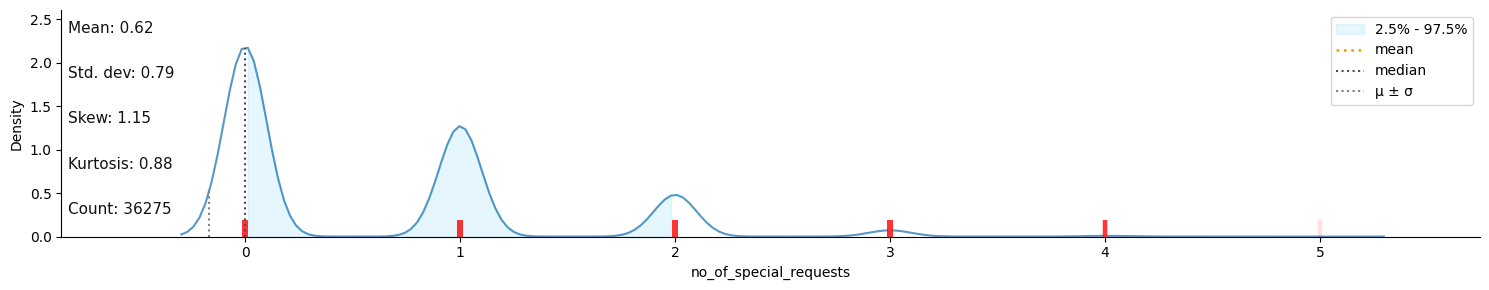

In [9]:
k.dist_plot(df);

In [10]:
df.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [11]:
df.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [12]:
df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [13]:
df.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [14]:
df.query('market_segment_type=="Complementary"')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35469,INN35470,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,8,Complementary,0,0,0,0.0,0,Not_Canceled
35836,INN35837,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2018,1,27,Complementary,0,0,0,0.0,0,Not_Canceled
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled


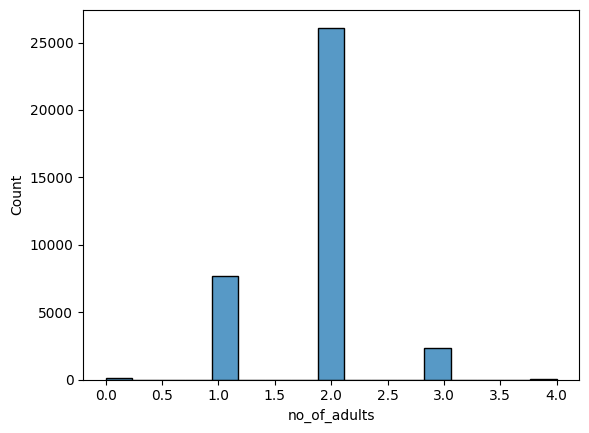

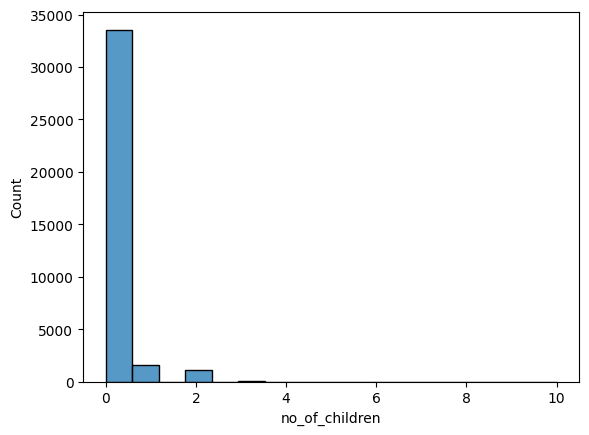

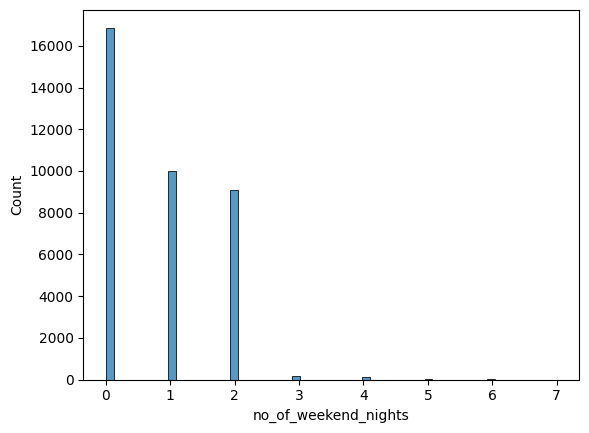

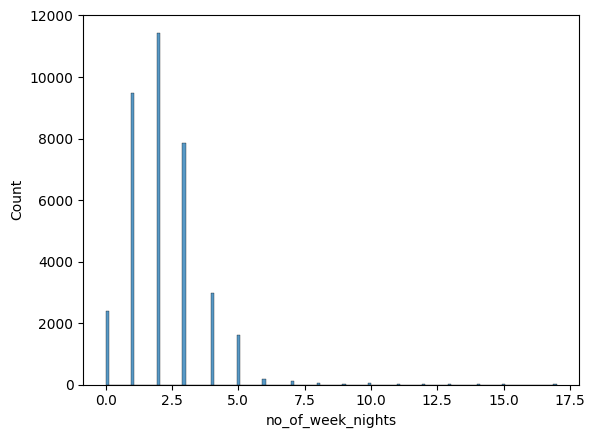

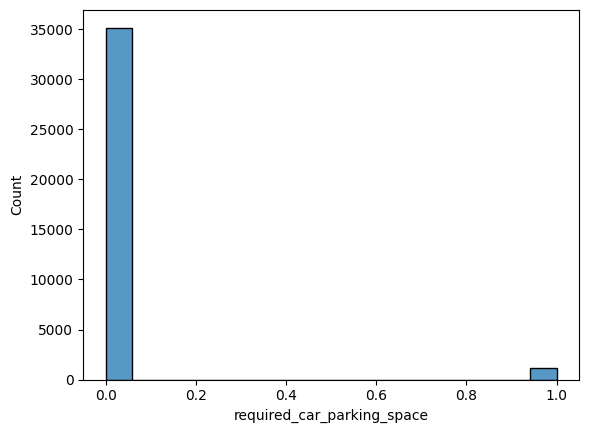

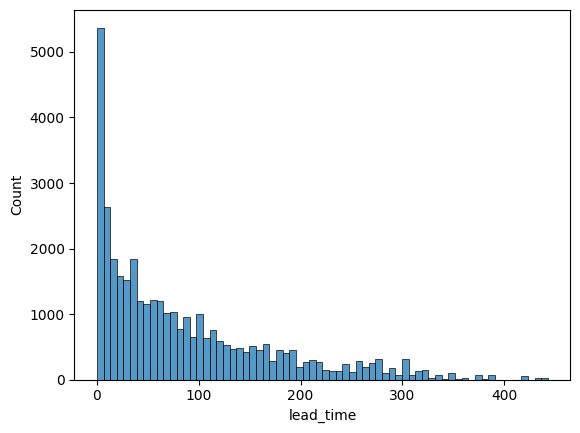

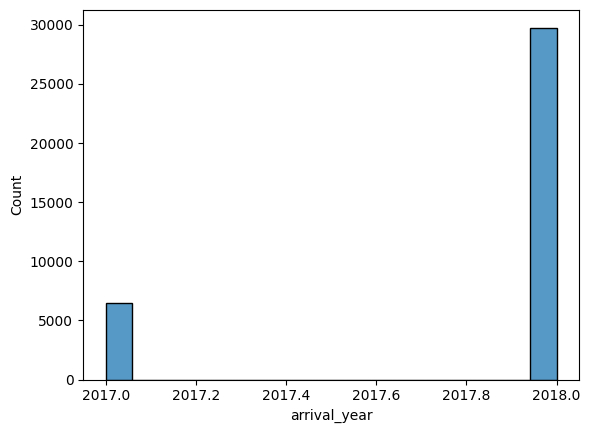

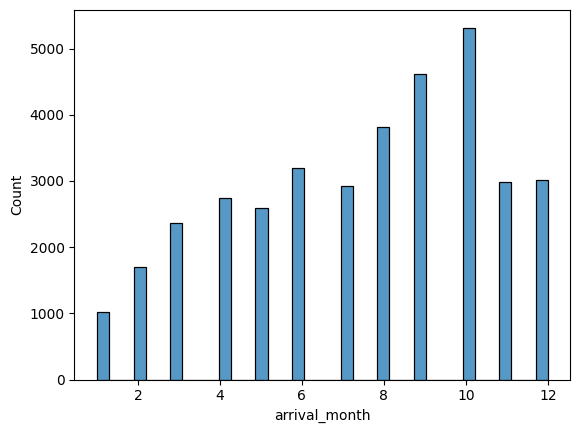

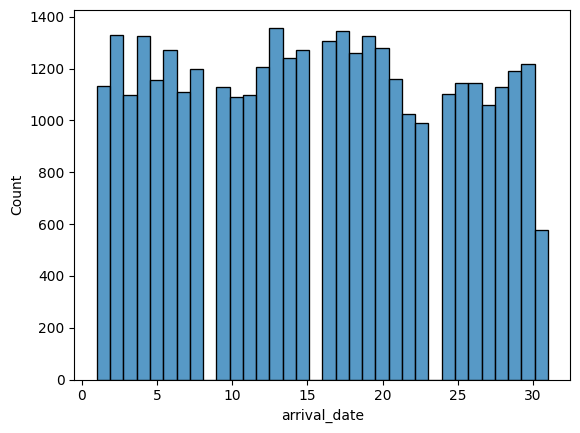

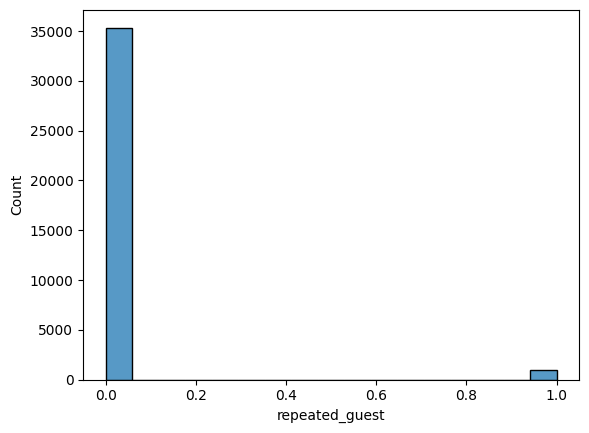

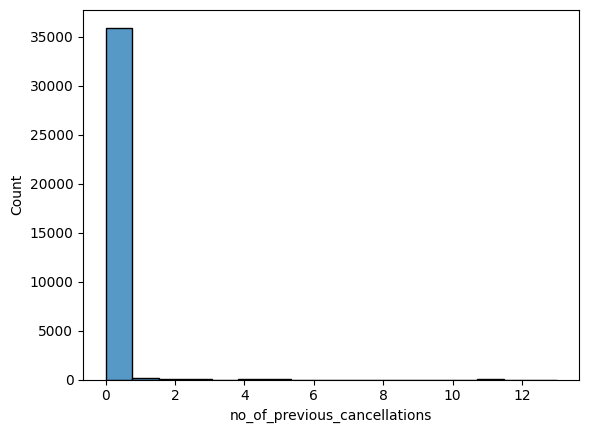

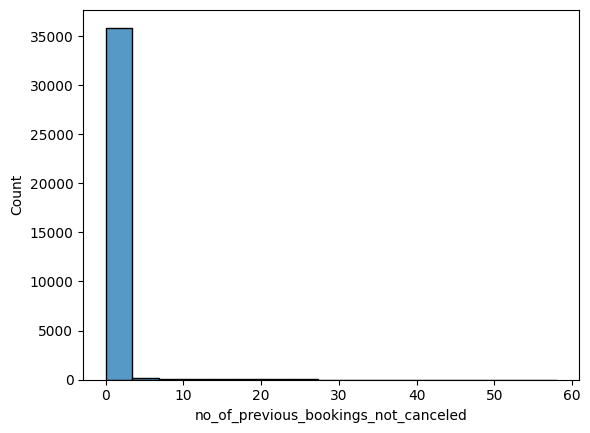

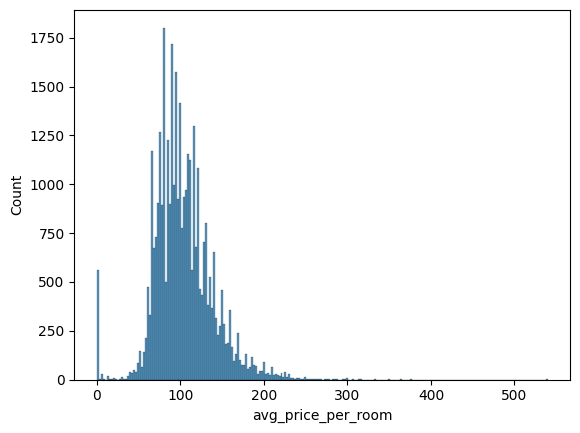

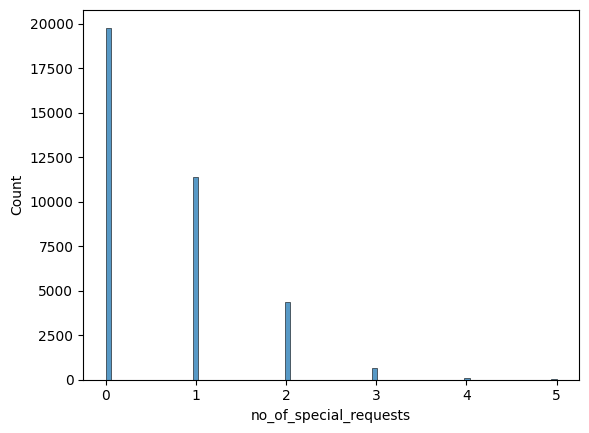

In [15]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.histplot(x=df[i])
        plt.show();

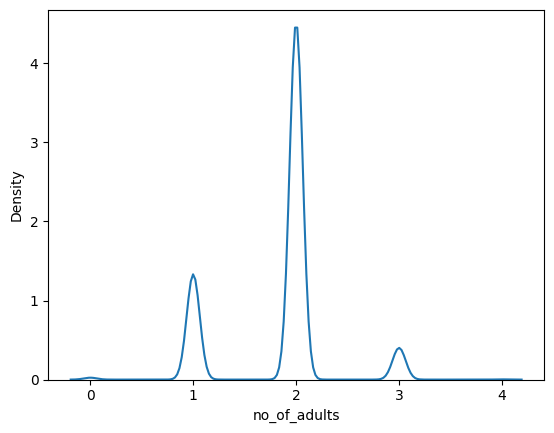

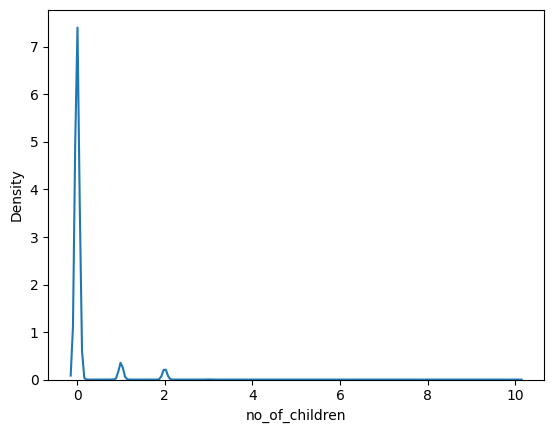

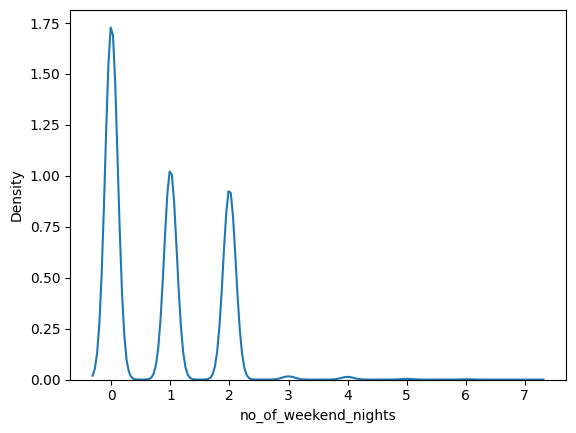

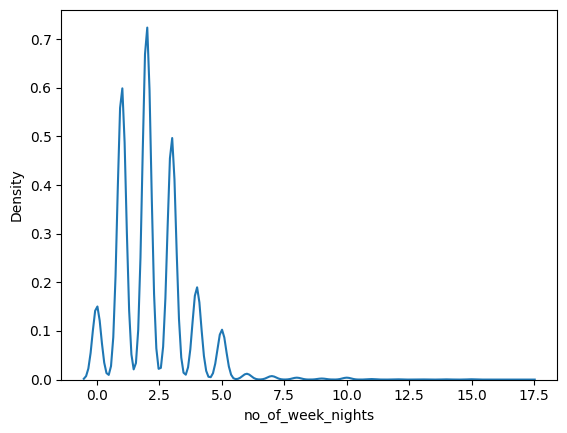

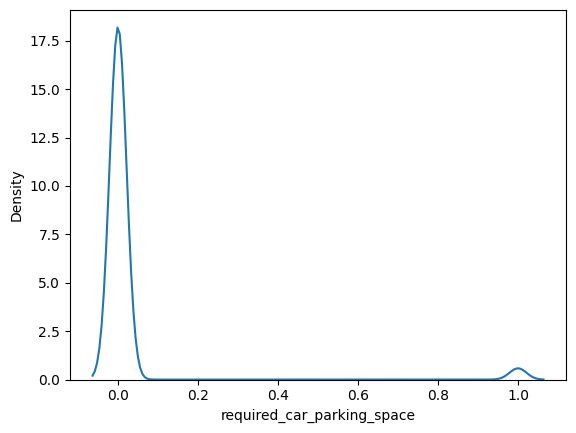

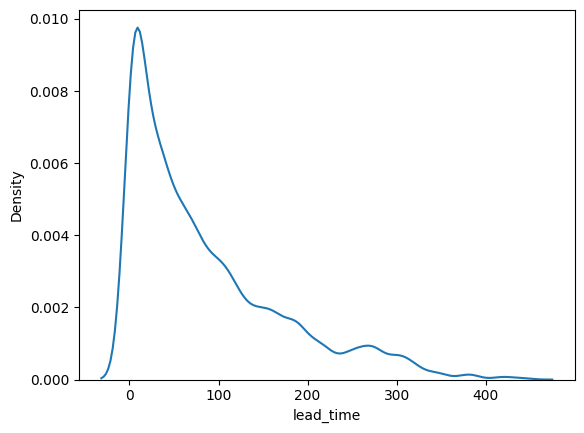

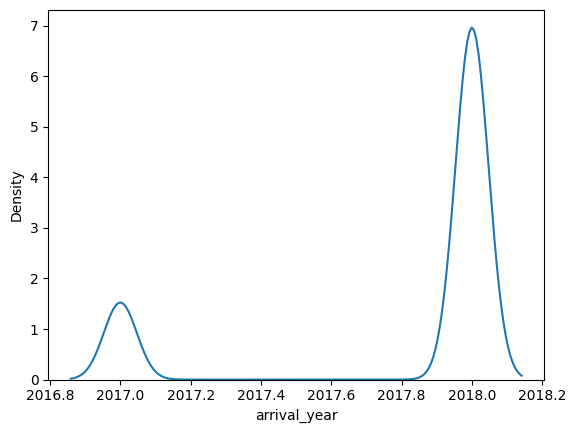

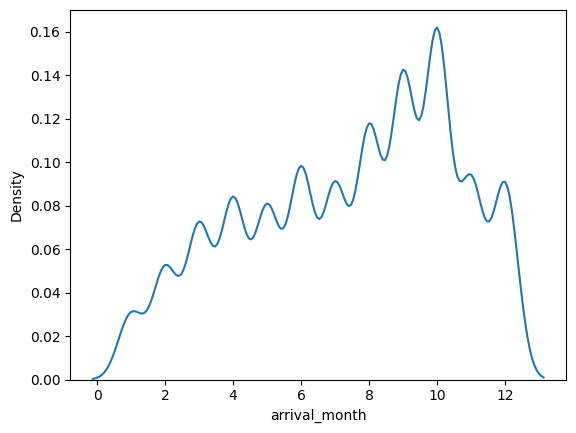

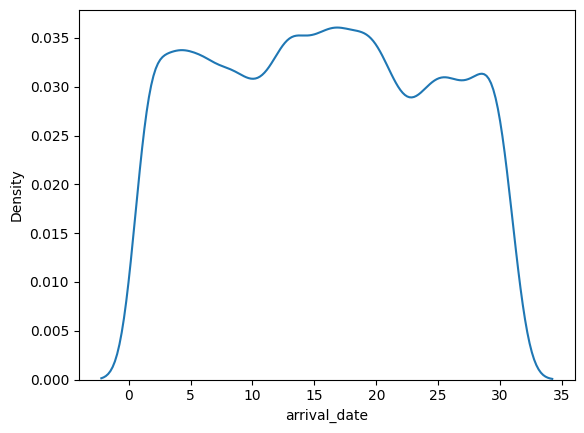

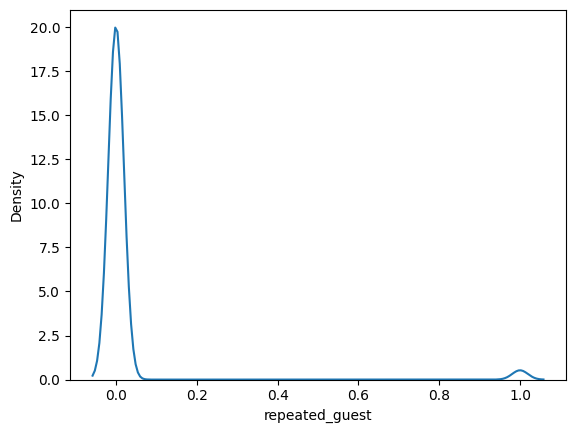

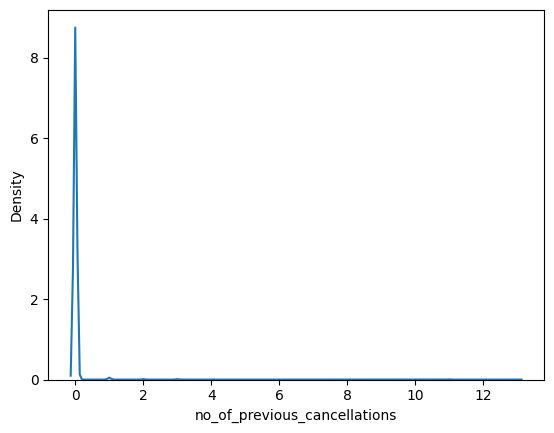

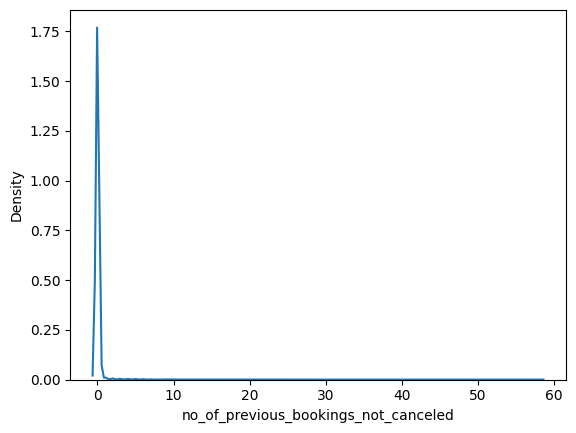

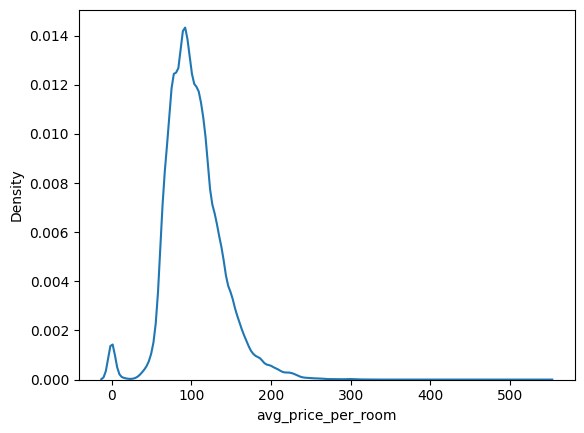

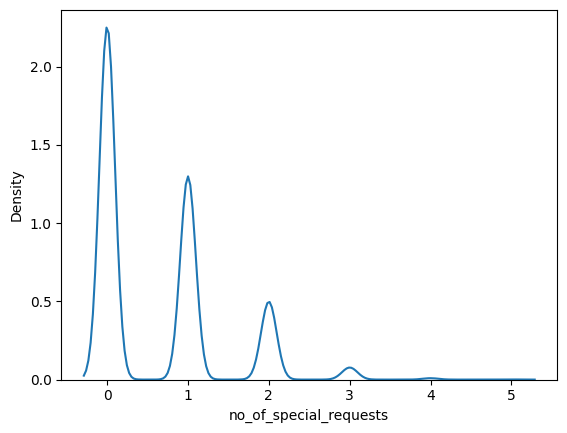

In [16]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.kdeplot(x=df[i])
        plt.show();

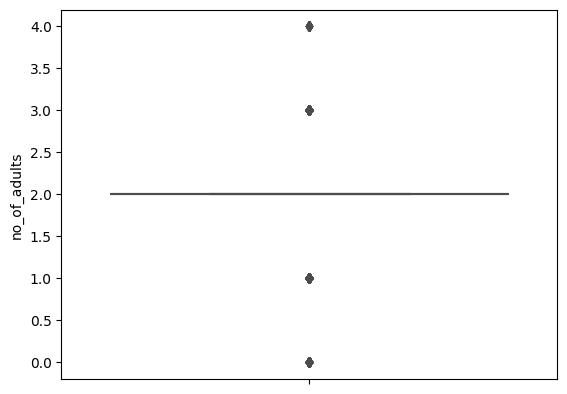

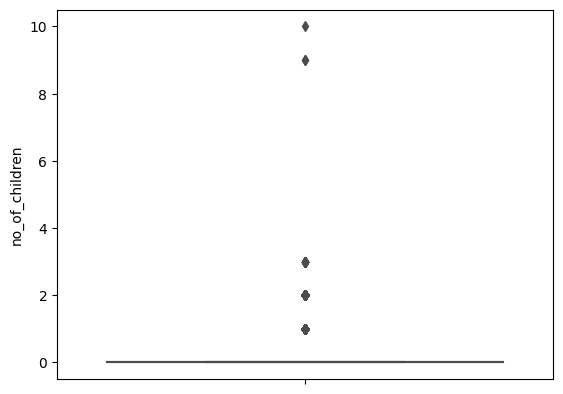

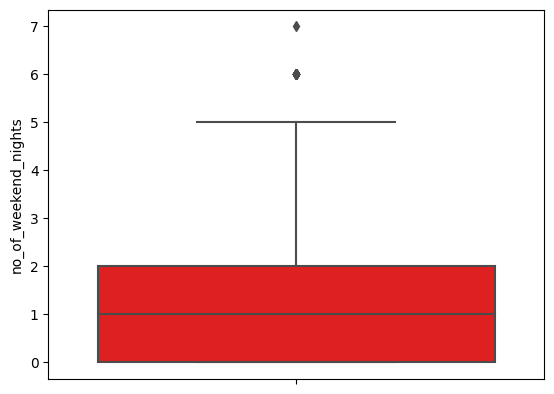

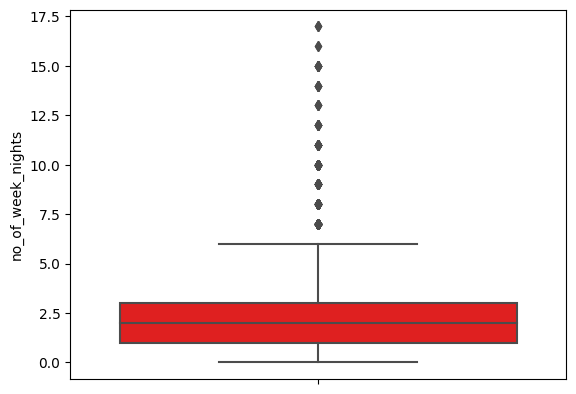

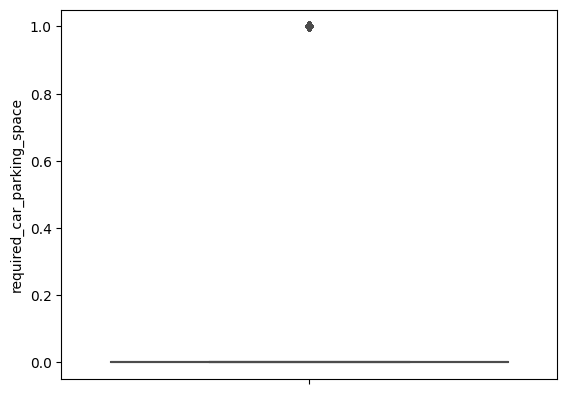

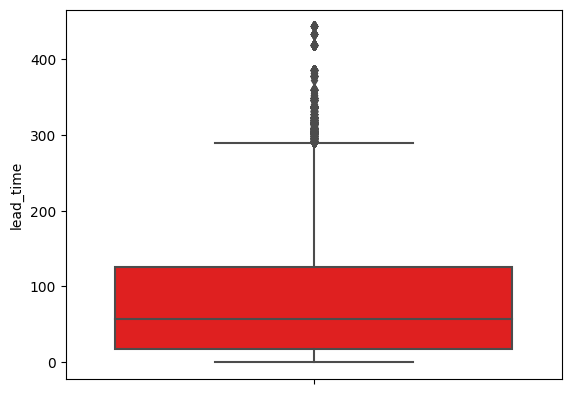

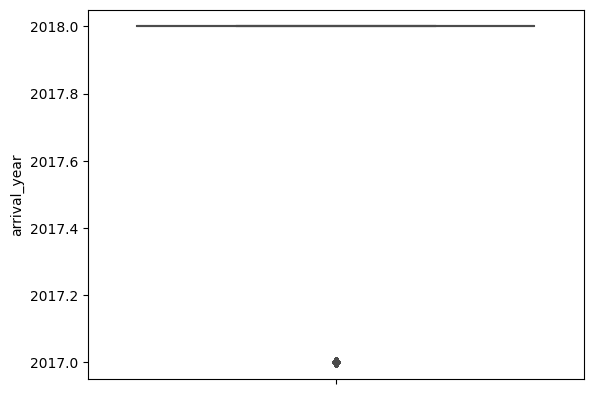

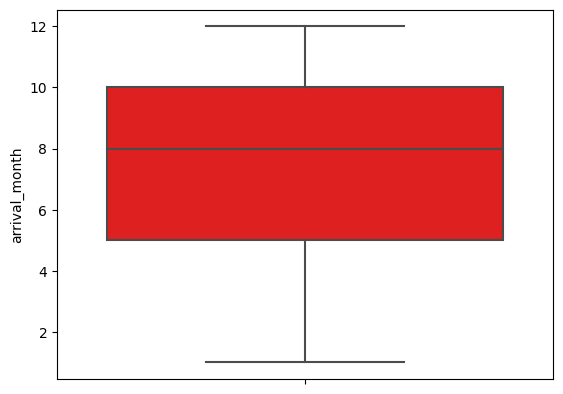

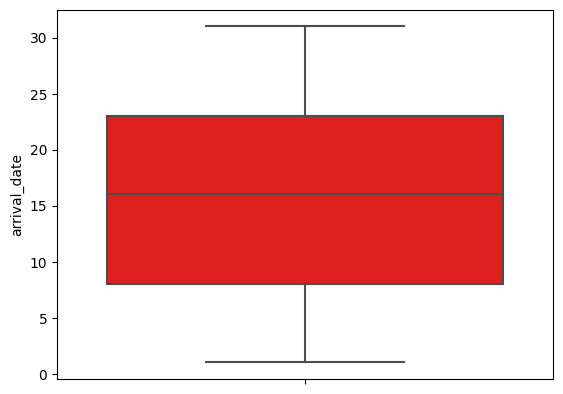

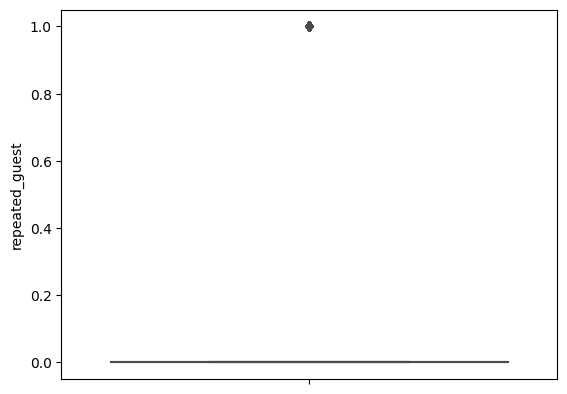

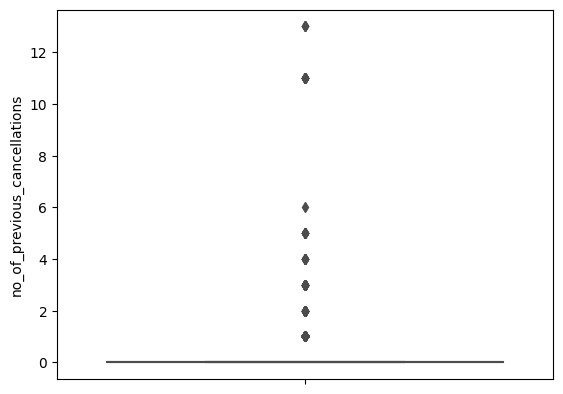

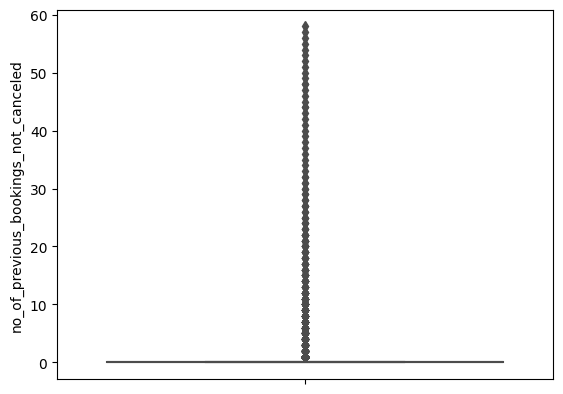

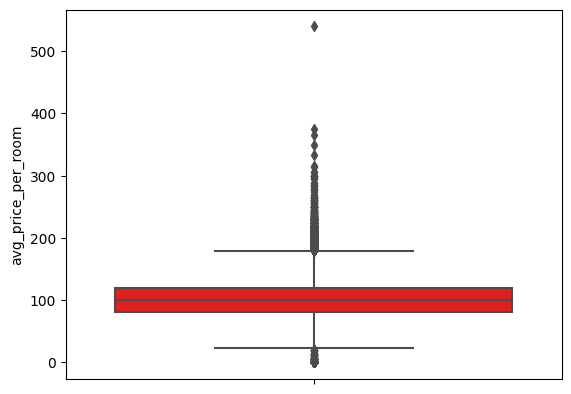

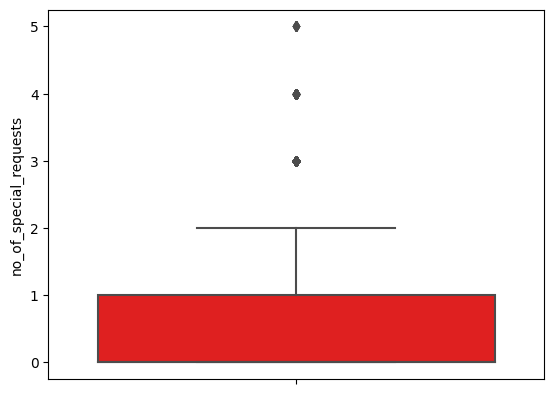

In [17]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color='red')
        plt.show();

In [18]:
def outlier_limit(col):
        Q3,Q1=np.nanpercentile(col,[75,25])
        IQR=Q3-Q1
        UL=Q3+1.5*IQR
        LL=Q1-1.5*IQR
        return UL,LL
        

In [19]:
for i in df.columns:
    if df[i].dtype !="object":
        UL,LL = outlier_limit(df[i])
        df[i] = np.where((df[i]>UL)|(df[i]<LL), np.nan, df[i])

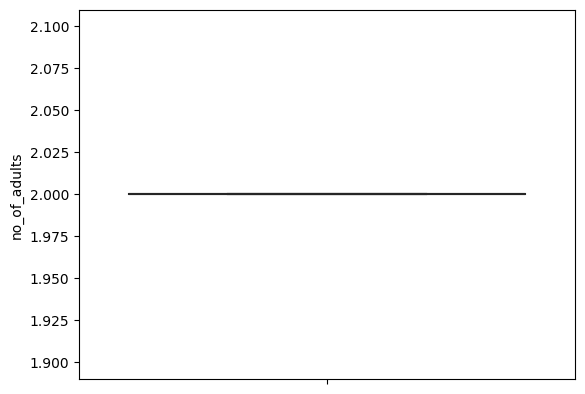

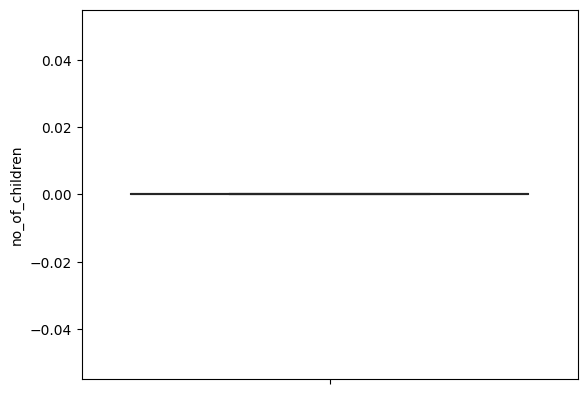

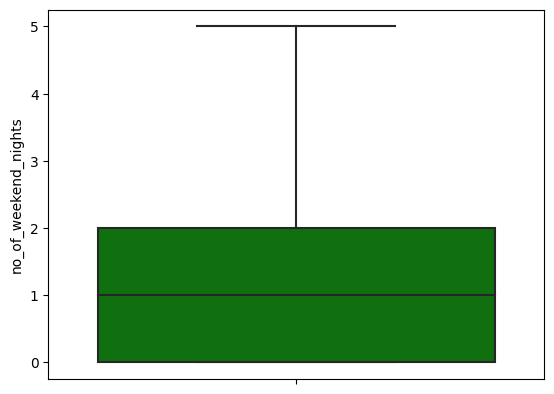

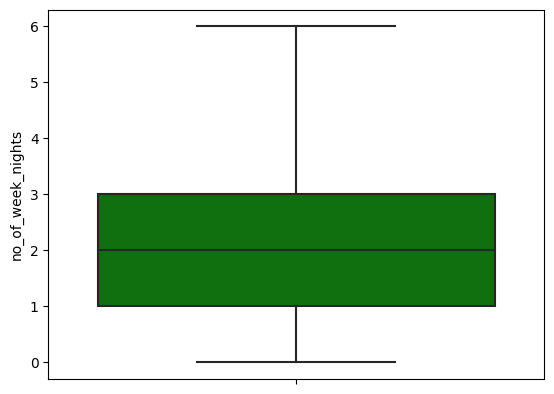

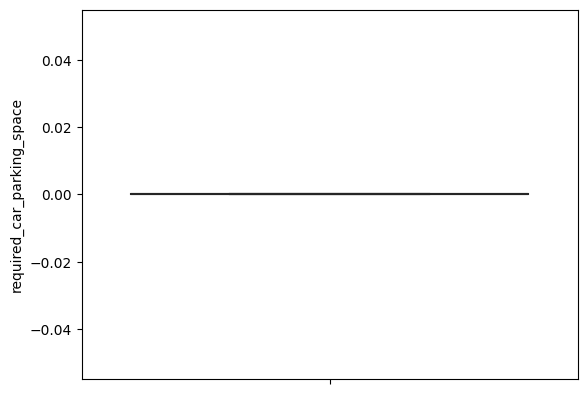

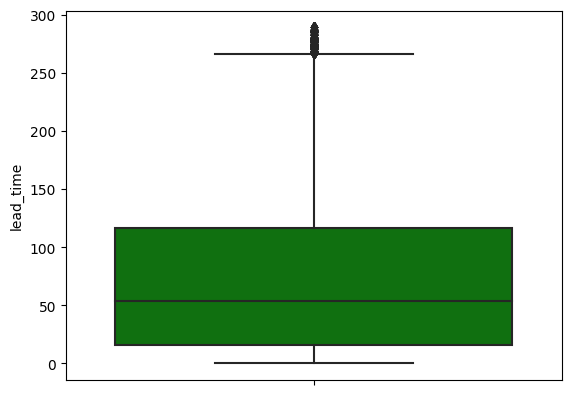

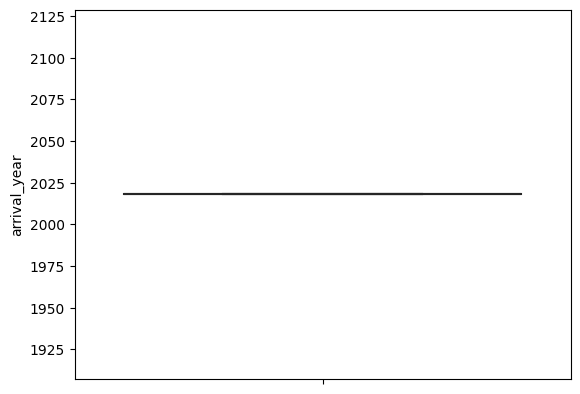

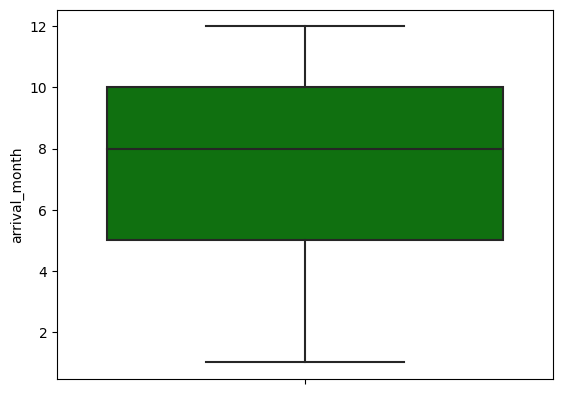

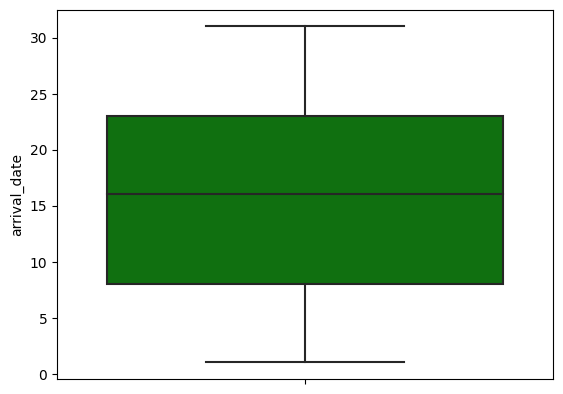

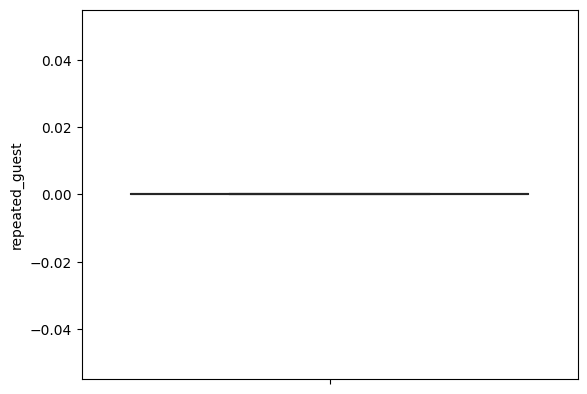

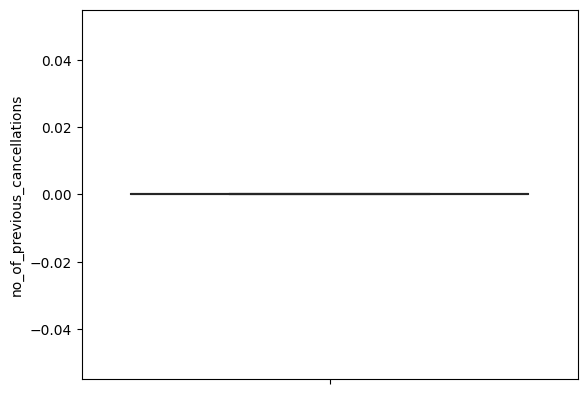

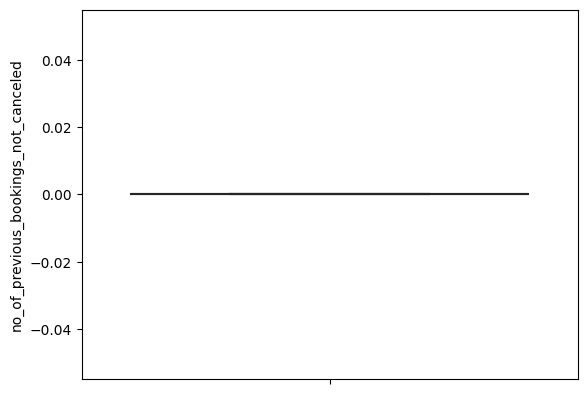

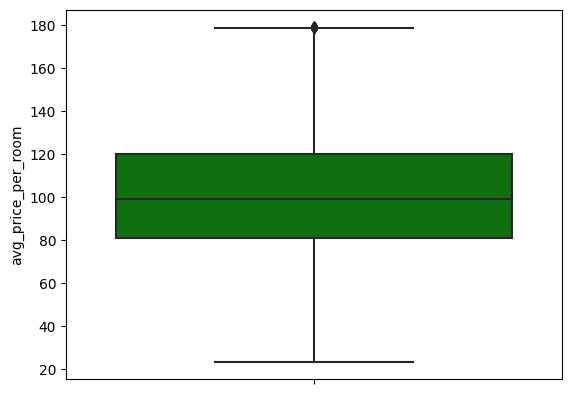

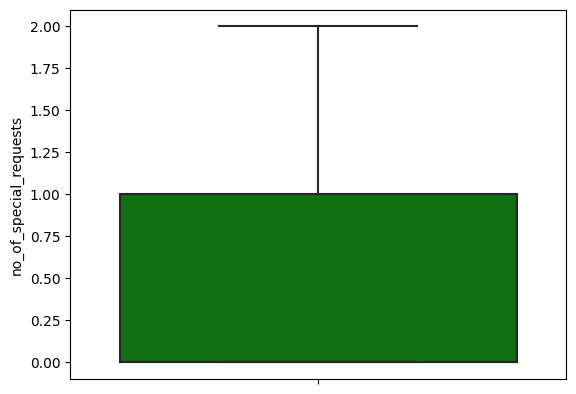

In [20]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],color='green')
        plt.show();

In [34]:
df.isnull().mean()*100

Booking_ID                               0.000000
no_of_adults                            28.027567
no_of_children                           7.437629
no_of_weekend_nights                     0.057891
no_of_week_nights                        0.893177
type_of_meal_plan                        0.000000
required_car_parking_space               3.098553
room_type_reserved                       0.000000
lead_time                                3.669194
arrival_year                            17.957271
arrival_month                            0.000000
arrival_date                             0.000000
market_segment_type                      0.000000
repeated_guest                           2.563749
no_of_previous_cancellations             0.931771
no_of_previous_bookings_not_canceled     2.238456
avg_price_per_room                       4.675396
no_of_special_requests                   2.097864
booking_status                           0.000000
dtype: float64

In [37]:
df.dropna(inplace =True)

In [38]:
df.isnull().mean()*100

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16746 entries, 1 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            16746 non-null  object 
 1   no_of_adults                          16746 non-null  float64
 2   no_of_children                        16746 non-null  float64
 3   no_of_weekend_nights                  16746 non-null  float64
 4   no_of_week_nights                     16746 non-null  float64
 5   type_of_meal_plan                     16746 non-null  int32  
 6   required_car_parking_space            16746 non-null  float64
 7   room_type_reserved                    16746 non-null  int32  
 8   lead_time                             16746 non-null  float64
 9   arrival_year                          16746 non-null  float64
 10  arrival_month                         16746 non-null  float64
 11  arrival_date   

In [40]:
le= LabelEncoder()

In [41]:
df['type_of_meal_plan']=le.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved']=le.fit_transform(df['room_type_reserved'])
df['market_segment_type']=le.fit_transform(df['market_segment_type'])
df['booking_status']=le.fit_transform(df['booking_status'])

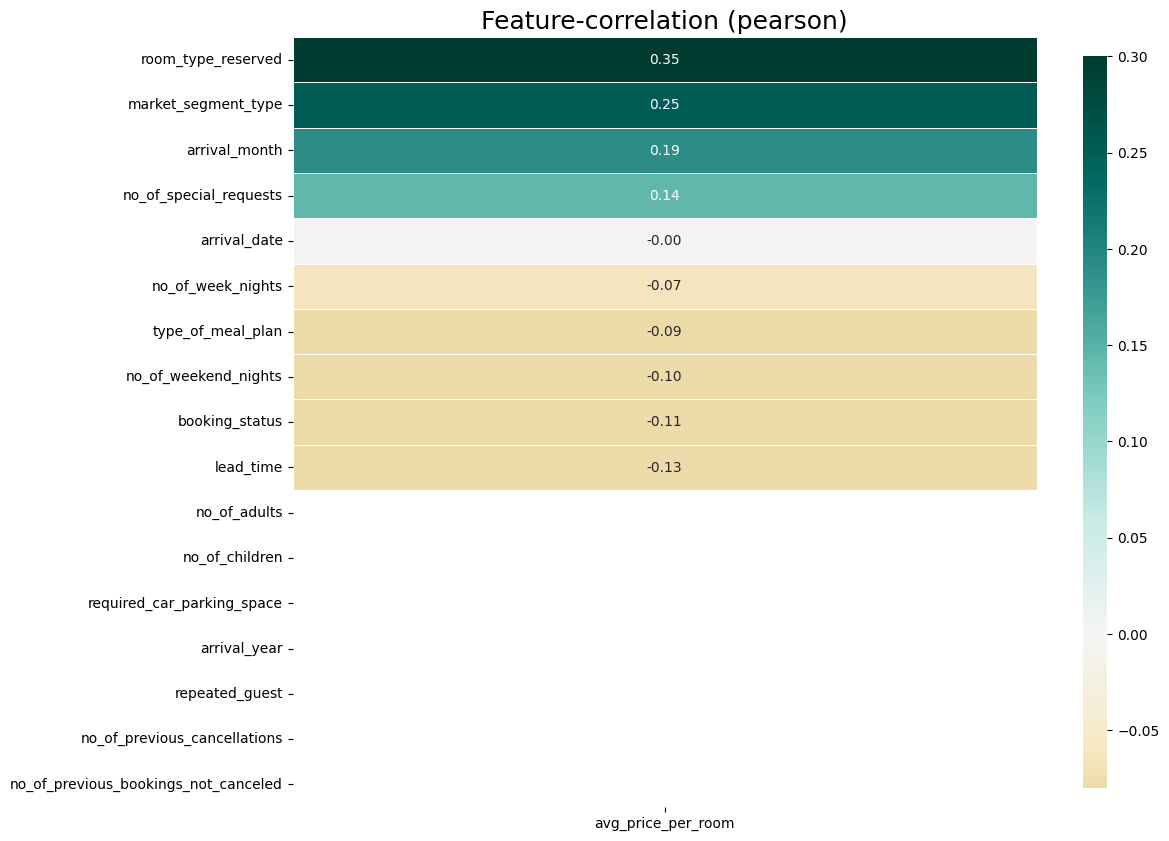

In [42]:
k.corr_plot(data=df,target='avg_price_per_room');

In [43]:
 x=df[['room_type_reserved','market_segment_type','arrival_month']]

In [44]:
y=df[['avg_price_per_room']].values

In [45]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [46]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
models ={
    "LinearRegression" : LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "HistGradientBoostingRegressor":HistGradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

In [49]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    score = r2_score(y_test,model.predict(x_test))*100
    mae= mean_absolute_error(y_test,model.predict(x_test))
    mse = mean_squared_error(y_test,model.predict(x_test)) 
    rmse = np.sqrt(mse)
    print("r2_score: ",score)
    print("training score: ",training_score)
    print("testing_score:  ",testing_score)
    print("mae: ",mae)
    print("mse: ",mse)
    print("rmse_test: ",rmse)
    print("*"*100)

model trained with LinearRegression
r2_score:  17.85601207428752
training score:  19.342798473163757
testing_score:   17.85601207428752
mae:  18.040518628407874
mse:  503.5289515176072
rmse_test:  22.439450784669557
****************************************************************************************************
model trained with Ridge
r2_score:  17.856089435927846
training score:  19.342798390753167
testing_score:   17.856089435927846
mae:  18.040528989501226
mse:  503.5284773036492
rmse_test:  22.439440218143794
****************************************************************************************************
model trained with LinearSVR
r2_score:  15.607084888504419
training score:  17.193534474143522
testing_score:   15.607084888504419
mae:  17.973982783655348
mse:  517.3145002411595
rmse_test:  22.74454880276062
****************************************************************************************************
model trained with Lasso
r2_score:  17.618427432038796
training 